In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
!pip install seaborn

In [1]:
pip install pandas numpy seaborn matplotlib scikit-learn

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [8]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"File {filename} downloaded successfully.")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")

# Ejemplo de uso
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
filename = 'housing.csv'
download(url, filename)

File housing.csv downloaded successfully.


In [9]:
df = pd.read_csv(filename)

In [10]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [12]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
# Drop the columns "id" and "Unnamed: 0"
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

# Display a statistical summary of the data
print(df.describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [14]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [15]:
# Calculate the mean of the 'bedrooms' column
mean = df['bedrooms'].mean()

# Replace missing values (NaN) in 'bedrooms' column with the mean
df['bedrooms'].replace(np.nan, mean, inplace=True)

# Verify the replacement by checking the first few rows
print(df['bedrooms'].head())

0    3.0
1    3.0
2    2.0
3    4.0
4    3.0
Name: bedrooms, dtype: float64


In [17]:
# Calculate the mean of the 'bathrooms' column
mean = df['bathrooms'].mean()

# Replace missing values (NaN) in 'bedrooms' column with the mean
df['bathrooms'].replace(np.nan, mean, inplace=True)

# Verify the replacement by checking the first few rows
print(df['bathrooms'].head())

0    1.00
1    2.25
2    1.00
3    3.00
4    2.00
Name: bathrooms, dtype: float64


In [18]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [19]:
# Count the number of unique floor values and convert to DataFrame
floor_counts = df['floors'].value_counts().to_frame()

# Rename the column for better clarity (optional)
floor_counts.columns = ['House Count']

# Display the DataFrame
print(floor_counts)

        House Count
floors             
1.0           10680
2.0            8241
1.5            1910
3.0             613
2.5             161
3.5               8


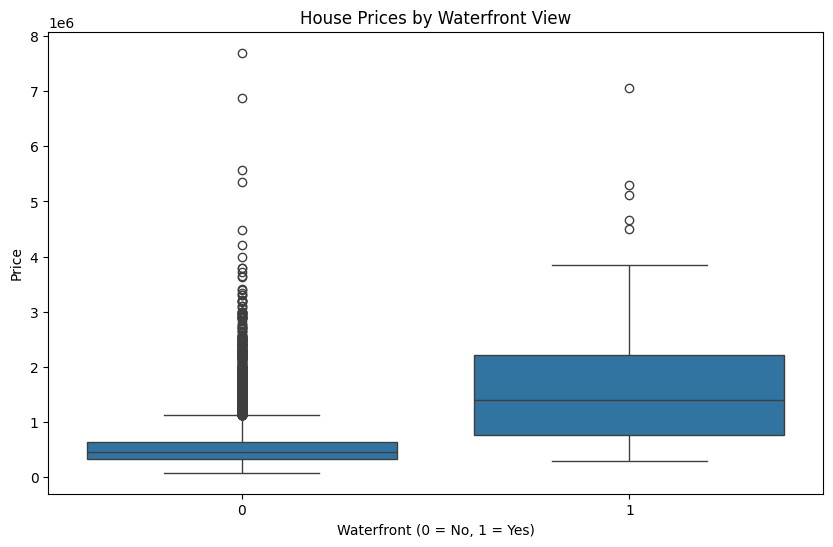

In [20]:
# Create the boxplot for house prices by waterfront view
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)

# Set labels for clarity
plt.title('House Prices by Waterfront View')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')

# Show the plot
plt.show()

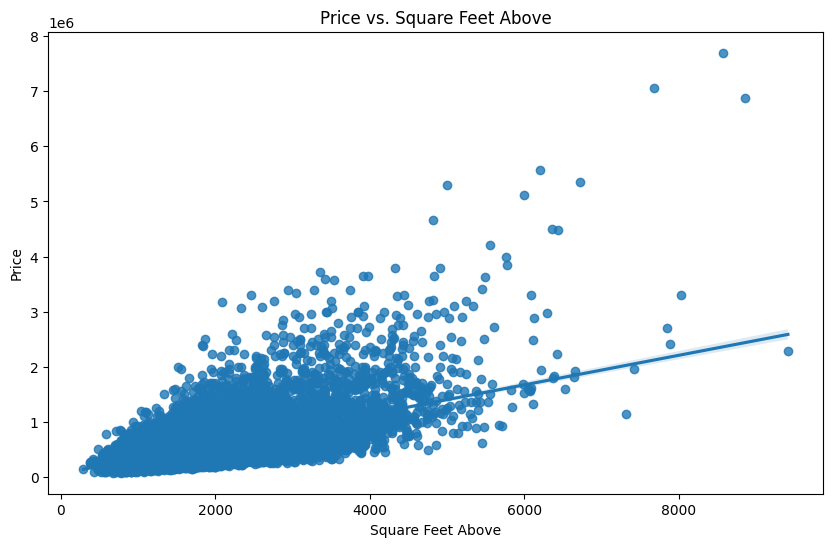

In [21]:
# Create a regression plot for sqft_above vs price
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=df)

# Set labels for clarity
plt.title('Price vs. Square Feet Above')
plt.xlabel('Square Feet Above')
plt.ylabel('Price')

# Show the plot
plt.show()

In [26]:
# Define the feature and target variable
X = df[['sqft_living']]
Y = df['price']

# Create a linear regression model
lm = LinearRegression()

# Fit the model
lm.fit(X, Y)

# Calculate the R^2 score
r_squared = lm.score(X, Y)

print(f"R^2 score for the linear regression model using sqft_living: {r_squared:.4f}")

R^2 score for the linear regression model using sqft_living: 0.4929


In [27]:
# Define the list of features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade",
            "sqft_living"]

# Define the feature set and target variable
X = df[features]
Y = df['price']

# Create a linear regression model
lm = LinearRegression()

# Fit the model
lm.fit(X, Y)

# Calculate the R^2 score
r_squared = lm.score(X, Y)

print(f"R^2 score for the linear regression model using the specified features: {r_squared:.4f}")

R^2 score for the linear regression model using the specified features: 0.6577


In [29]:
# Create a list of tuples with the estimator name and constructor
input_estimators = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

# Create a pipeline object
pipeline = Pipeline(input_estimators)

# Fit the pipeline to the data
pipeline.fit(df[features], df['price'])

# Calculate the R^2 score
r_squared = pipeline.score(df[features], df['price'])

print(f"R^2 score for the pipeline model: {r_squared:.4f}")

R^2 score for the pipeline model: 0.7513


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Assuming df is your DataFrame containing the housing data

# Define the features and target variable
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade",
            "sqft_living"]

X = df[features]
Y = df['price']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("Number of test samples:", x_test.shape[0])
print("Number of training samples:", x_train.shape[0])

# Create and fit the Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)

# Calculate the R^2 score using the test data
r_squared = ridge_model.score(x_test, y_test)

print(f"R^2 score for the Ridge regression model: {r_squared:.4f}")

Number of test samples: 3242
Number of training samples: 18371
R^2 score for the Ridge regression model: 0.6479


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Assuming df is your DataFrame containing the housing data

# Define the features and target variable
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade",
            "sqft_living"]

X = df[features]
Y = df['price']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("Number of test samples:", x_test.shape[0])
print("Number of training samples:", x_train.shape[0])

# Create a pipeline to perform polynomial transformation and fit Ridge regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Second order polynomial features
    ('ridge', Ridge(alpha=0.1))  # Ridge regression with regularization parameter 0.1
])

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Calculate the R^2 score using the test data
r_squared = pipeline.score(x_test, y_test)

print(f"R^2 score for the Ridge regression model with polynomial features: {r_squared:.4f}")

Number of test samples: 3242
Number of training samples: 18371
R^2 score for the Ridge regression model with polynomial features: 0.7003
